In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline

## Install this on a new system
# nltk.download('punkt')
from nltk.tokenize import word_tokenize


warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')




## Get the overall info from the dataset


In [2]:
## Read the dataset from CSV file

city_df = pd.read_csv("textdata/Phoenix-dataset.csv")



In [3]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 1085 non-null   object 
 1   created_at                  1086 non-null   object 
 2   hashtags                    557 non-null    object 
 3   media                       41 non-null     object 
 4   urls                        1014 non-null   object 
 5   favorite_count              1086 non-null   int64  
 6   id                          1086 non-null   int64  
 7   in_reply_to_screen_name     63 non-null     object 
 8   in_reply_to_status_id       62 non-null     float64
 9   in_reply_to_user_id         63 non-null     float64
 10  lang                        1086 non-null   object 
 11  place                       1085 non-null   object 
 12  possibly_sensitive          1034 non-null   object 
 13  retweet_count               1086 

In [4]:
city_df.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,"-112.01245298,33.62728136",Tue Apr 21 03:18:55 +0000 2020,true hanzo4life barberhustle sharpfade barber ...,NaN,https://www.instagram.com/p/BiXU8M8nGxg/?igshi...,0,1252436627680456704,NaN,NaN,NaN,...,10,227,0,3202 E greenway rd suite 1603,pv barbers llc,pvbarbers,67,NaN,http://best.pvbarbers.com,False
1,"-111.831562,33.414035",Thu Mar 26 18:40:42 +0000 2020,NaN,NaN,https://www.instagram.com/p/B-NQ62yD3Fb/?igshi...,0,1243246517814788099,NaN,NaN,NaN,...,1704,1114,36,Orlando Florida/ USA/ Global,The Original Lushess1,ThaLushess1,37850,NaN,https://linktr.ee/ThaLushess1,False
2,"-112.0777,33.4482",Fri Mar 20 19:17:19 +0000 2020,212icecreamstudio takeout takeoutfood icecream...,NaN,https://www.instagram.com/p/B994VxGFSiN/?igshi...,1,1241081403930017792,NaN,NaN,NaN,...,126,436,3,United States,SignsThatSell,SignsThatSell,321,NaN,http://signsthatsell.com,False
3,"-111.8718415,33.610317",Sat Apr 25 02:43:09 +0000 2020,staysafe safety family coronavirus security st...,NaN,https://www.instagram.com/p/B_YzL03HTHa/?igshi...,0,1253877175024939009,NaN,NaN,NaN,...,759,4999,17,N 35°12' 0'' / W 80°50' 0'',Kelly St Clair,rnkellystclair,18622,NaN,http://www.stclairsolutions.com,False
4,"-111.831562,33.414035",Tue Apr 21 06:52:15 +0000 2020,dj turntablist portablist turnstyledjtraining ...,NaN,https://www.instagram.com/p/B_O8J5Enhj1/?igshi...,0,1252490314247319552,NaN,NaN,NaN,...,742,909,18,Arizona,DJ Psychopat,djpsychopat,5351,NaN,NaN,False


In [5]:
# ASSIGN Set dataset info 

# toronto_df.info()
# toronto_df.head(5)


## Create a dataframe with a column for tweets
#df_text = toronto_df['text']
# df_text = toronto_df[['text']].convert_dtypes(object,str)

df_text = city_df[['text']].convert_dtypes(object,str)
df_text['created_at'] = city_df[['created_at']].convert_dtypes(object,str)
df_text['place'] = city_df[['place']].convert_dtypes(object,str)
df_text['hashtags'] = city_df[['hashtags']].convert_dtypes(object,str)

# df_timebased_tweets = 
## Perhaps we need the hashtags too
# created_at	, hashtags,  place

#df_text = toronto_df[['hashtags','text']]

#df_text.info()
# df_text.head(10)            

In [6]:
df_text.head(10)    

,text,created_at,place,hashtags
0,once upon a time before covid19 #true story #...,Tue Apr 21 03:18:55 +0000 2020,"Phoenix, AZ",true hanzo4life barberhustle sharpfade barber ...
1,This shit just got real... I waited to post th...,Thu Mar 26 18:40:42 +0000 2020,"Mesa, AZ",<NA>
2,Are you open? #212icecreamstudio is #takeout ...,Fri Mar 20 19:17:19 +0000 2020,"Phoenix, AZ",212icecreamstudio takeout takeoutfood icecream...
3,Do not listen to what they say. Watch what th...,Sat Apr 25 02:43:09 +0000 2020,"Scottsdale, AZ",staysafe safety family coronavirus security st...
4,I was at home celebrating 420 minding my own b...,Tue Apr 21 06:52:15 +0000 2020,"Mesa, AZ",dj turntablist portablist turnstyledjtraining ...
5,Get your stanky booty to Cave Creek &amp; Care...,Thu Apr 16 05:21:19 +0000 2020,"Cave Creek, AZ",walmart cavecreek toiletpaper quarantinelife m...
6,My #coronacation2020 has taken Pandora and me ...,Mon Apr 20 15:38:02 +0000 2020,"Scottsdale, AZ",coronacation2020 covid19
7,In-ground trampoline installation . . . . . #...,Sun Apr 05 16:26:12 +0000 2020,"Scottsdale, AZ",flips backflip gymternet parkour gymnastics tu...
8,On our ascent on the Corona de Loma Trail. Tr...,Sat Apr 04 17:28:16 +0000 2020,"Phoenix, AZ",trailporn coronadeloma southmountain hikearizo...
9,"Getting those Corona legs finally! @ Verrado, ...",Sat Apr 18 23:14:46 +0000 2020,"Buckeye, AZ",<NA>


## Cleaning the text Data

In [7]:
#1-Clean Emojis from text
def cleanEmoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#2-CleanTweets function replaces non-text entities with space
def cleanTweets(text):
    text = re.sub(r'@[A-Za-z0-9]','',text, flags=re.MULTILINE)  # Remove @mentions
    text = re.sub(r'#','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'@','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'RT[\s]+','',text, flags=re.MULTILINE)        # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text, flags=re.MULTILINE) # Remove the hyper link
    text = re.sub(r'http?:\/\/\S+','',text, flags=re.MULTILINE)  # Remove the hyper link

    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Note: remove special charactres and punctuations -
    text = re.sub(r'[^a-zA-Z# ]','',text, flags=re.MULTILINE)
    
    
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotography', '', text, flags=re.MULTILINE)
    text = re.sub('igstreet', '', text, flags=re.MULTILINE)   
    text = re.sub('cityscape', '', text, flags=re.MULTILINE)
    text = re.sub('streetphotographer', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotogallery', '', text, flags=re.MULTILINE)
    text = re.sub('photodocumentary', '', text, flags=re.MULTILINE)
    text = re.sub('ig_street', '', text, flags=re.MULTILINE)
    text = re.sub('Covid', '', text, flags=re.MULTILINE)
    text = re.sub('COVID', '', text, flags=re.MULTILINE)
    text = re.sub('covid', '', text, flags=re.MULTILINE)
    text = re.sub('spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('Spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('lensculture', '', text, flags=re.MULTILINE)
    text = re.sub('Toronto', '', text, flags=re.MULTILINE)
    text = re.sub('Ontario', '', text, flags=re.MULTILINE)
    text = re.sub('will', '', text, flags=re.MULTILINE)
    text = re.sub('bnw', '', text, flags=re.MULTILINE)
    text = re.sub('bw', '', text, flags=re.MULTILINE)


    text = re.sub(r'\xc2\xb7','',text)  # Remove bullet points
    text = re.sub(r'\u2022','',text)  # Remove bullet points       
    # text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)          # Remove links that start with HTTP/HTTPS in the tweet
    # text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)           # Remove other url links


    return text


In [8]:
# pass the text through cleantweet and removeEmoji functions
# s = df_text.iloc[[2]]
df_text['text'] = df_text['text'].apply(cleanTweets)
df_text['text'] = df_text['text'].apply(cleanEmoji)




In [9]:
df_text.head(2)

,text,created_at,place,hashtags
0,once upon a time before true story hanzolife...,Tue Apr 21 03:18:55 +0000 2020,"Phoenix, AZ",true hanzo4life barberhustle sharpfade barber ...
1,This shit just got real I waited to post this ...,Thu Mar 26 18:40:42 +0000 2020,"Mesa, AZ",<NA>


# A- Sentence Level Analysis

## Start working on the contect and subject area

In [10]:
#create a function to get the subjectivity
def getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns to add the sentiment and polarity
df_text['subjectivity'] = df_text['text'].apply(getSubjectivity)
df_text['polarity'] = df_text['text'].apply(getPolarity)

#Display the new dataset
df_text.head(10)


,text,created_at,place,hashtags,subjectivity,polarity
0,once upon a time before true story hanzolife...,Tue Apr 21 03:18:55 +0000 2020,"Phoenix, AZ",true hanzo4life barberhustle sharpfade barber ...,0.65,0.35
1,This shit just got real I waited to post this ...,Thu Mar 26 18:40:42 +0000 2020,"Mesa, AZ",<NA>,0.55,0.00
2,Are you open icecreamstudio is takeout takeou...,Fri Mar 20 19:17:19 +0000 2020,"Phoenix, AZ",212icecreamstudio takeout takeoutfood icecream...,0.50,0.00
3,Do not listen to what they say Watch what the...,Sat Apr 25 02:43:09 +0000 2020,"Scottsdale, AZ",staysafe safety family coronavirus security st...,1.00,-0.50
4,I was at home celebrating minding my own biz ...,Tue Apr 21 06:52:15 +0000 2020,"Mesa, AZ",dj turntablist portablist turnstyledjtraining ...,1.00,0.60
5,Get your stanky booty to Cave Creek amp Carefr...,Thu Apr 16 05:21:19 +0000 2020,"Cave Creek, AZ",walmart cavecreek toiletpaper quarantinelife m...,0.00,0.00
6,My coronacation has taken Pandora and me to Di...,Mon Apr 20 15:38:02 +0000 2020,"Scottsdale, AZ",coronacation2020 covid19,0.00,0.00
7,Inground trampoline installation flips backfli...,Sun Apr 05 16:26:12 +0000 2020,"Scottsdale, AZ",flips backflip gymternet parkour gymnastics tu...,0.00,0.00
8,On our ascent on the Corona de Loma Trail Tra...,Sat Apr 04 17:28:16 +0000 2020,"Phoenix, AZ",trailporn coronadeloma southmountain hikearizo...,0.00,0.00
9,Getting those Corona legs finally Verrado Buc...,Sat Apr 18 23:14:46 +0000 2020,"Buckeye, AZ",<NA>,1.00,0.00


In [11]:
# df_text.head(10)
df_text.to_csv("textdata/myexportfile_phoenix.csv")

## Make a WordCloud chart -word frequency map

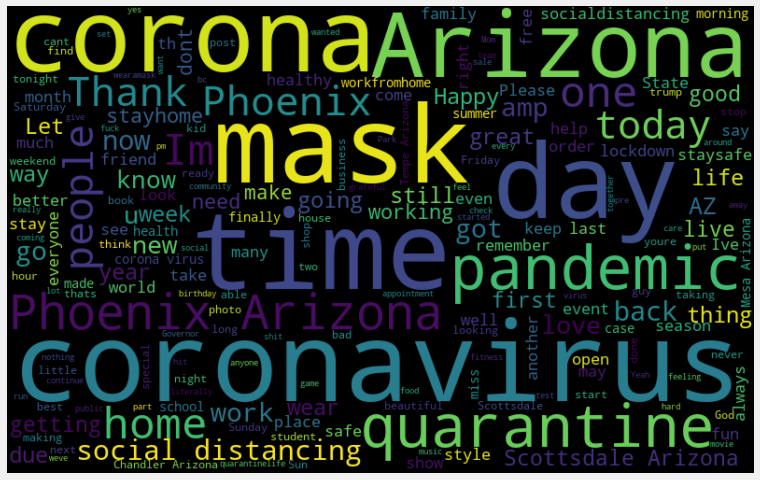

In [12]:
# plot outcome using word cloud
# visualize the most frequency used words
allWords = ' '.join(twts for twts in df_text['text'])

wordCloud = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords)

plt.figure(figsize=(19,8))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()


## Positive and Negative Sentiments

In [13]:
#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['analysis'] = df_text['polarity'].apply(getSentAnalysis)

#df_text


## All Negative Tweets

In [14]:
#print all of the negative tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Negative'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#         # print()  #to print uncomment
#         j = j+1

## All Positive Tweets

In [15]:
#print all of the Positive tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Positive'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#         print()
#         j = j+1

## Scatter pLot - map the postitive-negative distribution

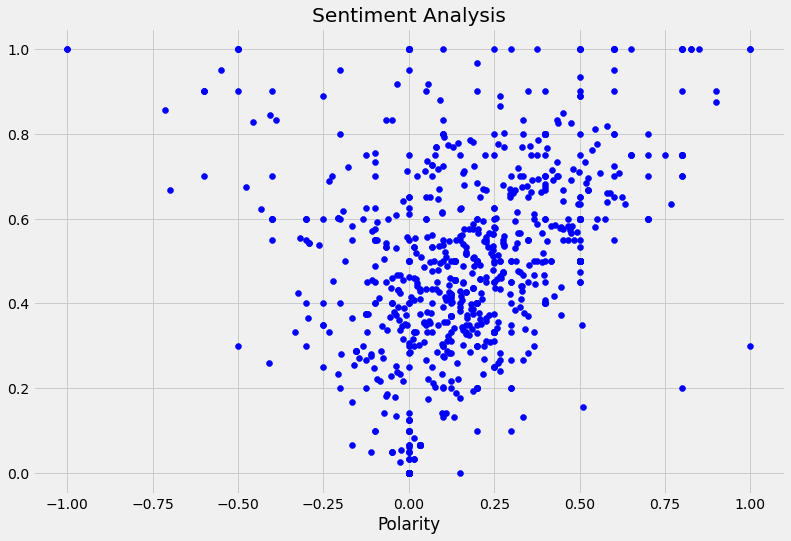

In [16]:
# plot the polarity and subjectivity
plt.figure(figsize=(12,8))
for i in range(0,df_text.shape[0]):
    plt.scatter(df_text['polarity'][i],df_text['subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

## Overall picture: Positive, Negative, Neutral


In [17]:
#Get the percentages: Positive, Negative, Neutral

## Percentage of Positive Tweets
ptweets = df_text[df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")


--> percentage of positive tweets: 56.7 %


In [18]:
# Get the percentage of negative tweets
ntweets = df_text[df_text.analysis == 'Negative']
ntweets = ntweets['text']

## Percentage of Negative Tweets

negativetweets = round( (ntweets.shape[0] / df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")


--> percentage of negative tweets: 15.8 %


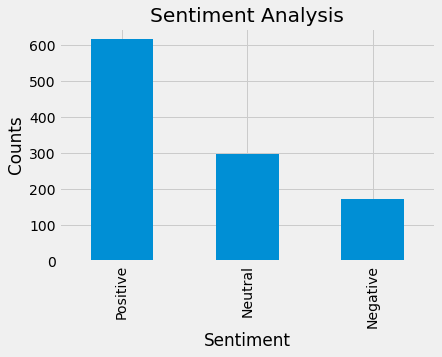

In [19]:
#Show the value counts
df_text['analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_text['analysis'].value_counts().plot(kind='bar')

plt.show('Sentiment')



# B- Word Level Analysis

## B.1 Define Tokenized Tweets

In [20]:
# import the stopword library

from nltk.corpus import stopwords
# nltk.download('stopwords')  #need to run on a new machine

import ast  #used for literal_eval



In [21]:
import nltk
##  Add a new column "tokenized_tw" to the dataset and include the tokenized tweets
##  split content into words

df_text['tokenized_tw'] = df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
# df_text['tokenized_tw'] = df_text['tokenized_tw'].tolist()

In [22]:
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,once upon a time before true story hanzolife...,Tue Apr 21 03:18:55 +0000 2020,"Phoenix, AZ",true hanzo4life barberhustle sharpfade barber ...,0.65,0.35,Positive,"[once, upon, a, time, before, true, story, han..."


In [23]:
# convert all fields to lower case
df_text = df_text.apply(lambda x: x.astype(str).str.lower())
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,once upon a time before true story hanzolife...,tue apr 21 03:18:55 +0000 2020,"phoenix, az",true hanzo4life barberhustle sharpfade barber ...,0.65,0.35,positive,"['once', 'upon', 'a', 'time', 'before', 'true'..."


## B.2 Apply Filters - Find/Remove Stopwords

In [24]:
# TODO double check the list of stop words, might need to use a different function later
# stop_words = stopwords.words('english')
# check what is included here 
# stop_words

In [25]:
df_text.head(2)
type(df_text['tokenized_tw'])

pandas.core.series.Series

In [26]:
## Apply filter for Stop Words { in , is, the , a, ... }
def remove_stopwords(TokenList):
  
    # Identify StopWords - get them from stopwords
    stop_words = stopwords.words('english')
    
    # convert string value to a list
    if isinstance(TokenList, str):
        TokenList = ast.literal_eval(TokenList)
 
        # TokenList = TokenList.split(",")
        for i, key in enumerate(TokenList):      
            if (key in stop_words):
                TokenList [i] = ''  
    
    return TokenList

          
nRecords = df_text['tokenized_tw'].count()
# nRecords = 3

# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(df_text['tokenized_tw'][x],str)):
        # tokenListHere = df_text['tokenized_tw'][0].split(",")
        df_text['tokenized_tw'][x] = remove_stopwords(df_text['tokenized_tw'][x])





In [27]:
# Remove 1 letter tokens
# df_text['tokenized_tw'] = df_text['tokenized_tw'].apply(lambda x: [item for item in str(x).split() if len(x) > 2])

df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,once upon a time before true story hanzolife...,tue apr 21 03:18:55 +0000 2020,"phoenix, az",true hanzo4life barberhustle sharpfade barber ...,0.65,0.35,positive,"[, upon, , time, , true, story, hanzolife, bar..."
1,this shit just got real i waited to post this ...,thu mar 26 18:40:42 +0000 2020,"mesa, az",<na>,0.55,0.0,neutral,"[, shit, , got, real, , waited, , post, , , , ..."


## B.2 Apply Filters - stemming words

In [28]:
#Stemming reduces words to their root or base.
from nltk.stem.porter import PorterStemmer

In [29]:
# stemming of words
def applyporter(TokenList):
    # create an object for stemming   
    porterstemmer = PorterStemmer()
    
    # TokenList = ast.literal_eval(TokenList)
    if isinstance(TokenList, str):
         TokenList = TokenList.split(",")

    for i, key in enumerate(TokenList):            
            TokenList [i] = porterstemmer.stem(key)                       
        
    return TokenList
# tokens = word_tokenize(text)



nRecords = df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x in range(nRecords-1):
    df_text['tokenized_tw'][x] = applyporter(df_text['tokenized_tw'][x])


In [30]:
df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,once upon a time before true story hanzolife...,tue apr 21 03:18:55 +0000 2020,"phoenix, az",true hanzo4life barberhustle sharpfade barber ...,0.65,0.35,positive,"[, upon, , time, , true, stori, hanzolif, barb..."
1,this shit just got real i waited to post this ...,thu mar 26 18:40:42 +0000 2020,"mesa, az",<na>,0.55,0.0,neutral,"[, shit, , got, real, , wait, , post, , , , , ..."


## Return the cleaned data into a sentence format

In [31]:
## combine word into a single sentence
for  i in range(nRecords):
    if isinstance(df_text['tokenized_tw'][i],list):
        df_text['tokenized_tw'][i] = " ".join(df_text['tokenized_tw'][i])


df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,once upon a time before true story hanzolife...,tue apr 21 03:18:55 +0000 2020,"phoenix, az",true hanzo4life barberhustle sharpfade barber ...,0.65,0.35,positive,upon time true stori hanzolif barberhustl s...
1,this shit just got real i waited to post this ...,thu mar 26 18:40:42 +0000 2020,"mesa, az",<na>,0.55,0.0,neutral,shit got real wait post overwhelm me...
2,are you open icecreamstudio is takeout takeou...,fri mar 20 19:17:19 +0000 2020,"phoenix, az",212icecreamstudio takeout takeoutfood icecream...,0.5,0.0,neutral,open icecreamstudio takeout takeoutfood ice...
3,do not listen to what they say watch what the...,sat apr 25 02:43:09 +0000 2020,"scottsdale, az",staysafe safety family coronavirus security st...,1.0,-0.5,negative,listen say watch dostaysaf safeti famil...
4,i was at home celebrating minding my own biz ...,tue apr 21 06:52:15 +0000 2020,"mesa, az",dj turntablist portablist turnstyledjtraining ...,1.0,0.6,positive,home celebr mind biz shaq pac albert ca...
5,get your stanky booty to cave creek amp carefr...,thu apr 16 05:21:19 +0000 2020,"cave creek, az",walmart cavecreek toiletpaper quarantinelife m...,0.0,0.0,neutral,get stanki booti cave creek amp carefre mo...
6,my coronacation has taken pandora and me to di...,mon apr 20 15:38:02 +0000 2020,"scottsdale, az",coronacation2020 covid19,0.0,0.0,neutral,coronac taken pandora disney world flori...
7,inground trampoline installation flips backfli...,sun apr 05 16:26:12 +0000 2020,"scottsdale, az",flips backflip gymternet parkour gymnastics tu...,0.0,0.0,neutral,inground trampolin instal flip backflip gymter...
8,on our ascent on the corona de loma trail tra...,sat apr 04 17:28:16 +0000 2020,"phoenix, az",trailporn coronadeloma southmountain hikearizo...,0.0,0.0,neutral,ascent corona de loma trail trail porn tra...
9,getting those corona legs finally verrado buc...,sat apr 18 23:14:46 +0000 2020,"buckeye, az",<na>,1.0,0.0,neutral,get corona leg final verrado buckey


## Create a WordCloud from cleaned tweets


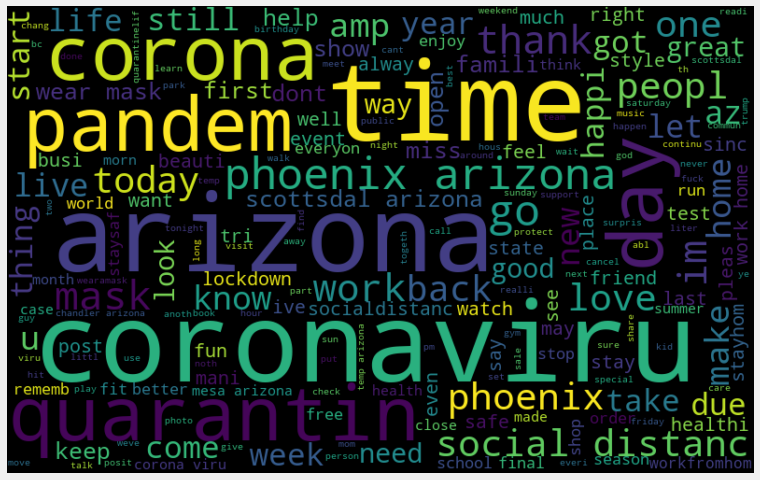

In [32]:
# visualize the most frequency used words using wordcloud

allWords = ' '.join(twts for twts in df_text['tokenized_tw'])

wordCloud = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords)

# size the plt object
plt.figure(figsize=(19,8))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

## Consider Location and Time in analysis

In [33]:

df_text.groupby(['place']).count


<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000251CC161E50>>

In [34]:
from datetime import datetime
from dateutil.parser import parse


In [35]:
#create a new column for data only
df_text['date'] = df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    df_text['date'][x] = datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
    # return date as a string
    # df_text['date'][x] = datetime.strftime(datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
  
# Extract month from the data variable, Add a new column
df_text['month']  = pd.DatetimeIndex(df_text['date']).month


In [36]:
df_text. head(3)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,once upon a time before true story hanzolife...,tue apr 21 03:18:55 +0000 2020,"phoenix, az",true hanzo4life barberhustle sharpfade barber ...,0.65,0.35,positive,upon time true stori hanzolif barberhustl s...,2020-04-21 03:18:55,4
1,this shit just got real i waited to post this ...,thu mar 26 18:40:42 +0000 2020,"mesa, az",<na>,0.55,0.0,neutral,shit got real wait post overwhelm me...,2020-03-26 18:40:42,3
2,are you open icecreamstudio is takeout takeou...,fri mar 20 19:17:19 +0000 2020,"phoenix, az",212icecreamstudio takeout takeoutfood icecream...,0.5,0.0,neutral,open icecreamstudio takeout takeoutfood ice...,2020-03-20 19:17:19,3


## Data preparation for further visualizations

In [37]:

# Group by place
# placesRecords = df_text.groupby(['place'])

# get the first item in each place group
# placesRecords.first()


# remove ontario from place column
lista = df_text.place.str.split(",",expand=True)
df_text['place'] = lista [0]


# convert the polarity and subjectivity values to numbers
df_text["polarity"] = pd.to_numeric(df_text['polarity'])
df_text["subjectivity"] = pd.to_numeric(df_text['subjectivity'])


# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment = df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment = df_text.groupby('month', as_index=False)['polarity'].mean()





In [38]:
df_region_sentiment.head(5)
# df_region_sentiment.sort_values(by='polarity')

,place,polarity
0,<na>,0.000000
1,anthem,0.000000
2,arizona,0.130380
3,avondale,0.133994
4,buckeye,-0.060606


<AxesSubplot:ylabel='place'>

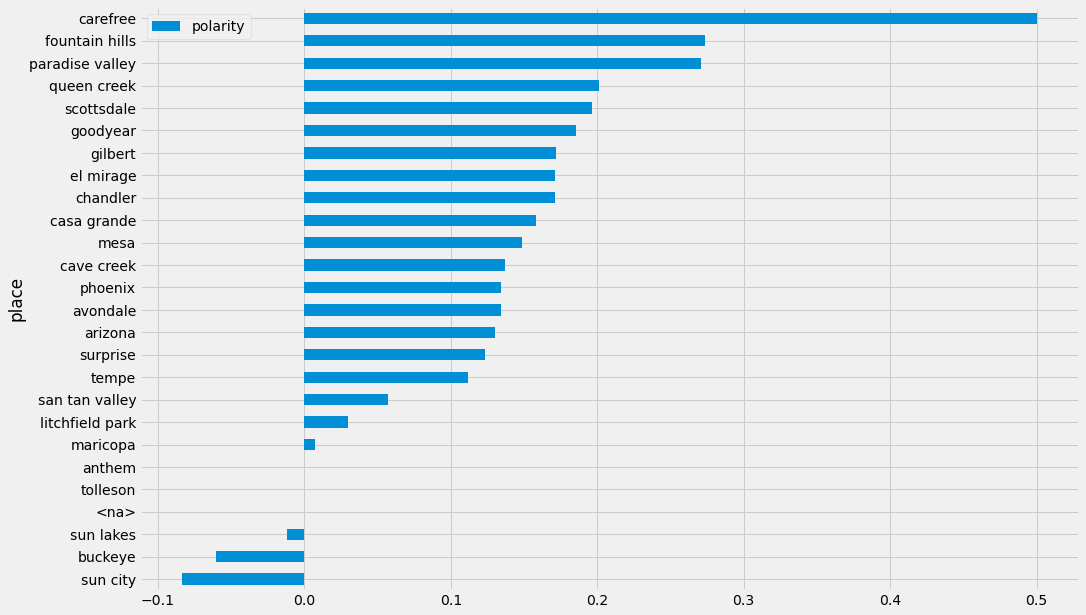

In [39]:
# Chart sentiments based on regions

#df_region_sentiment["polarity"] = pd.to_numeric(df_region_sentiment['polarity'])
df_region_sentiment.sort_values(by='polarity').plot.barh(x='place', y='polarity', rot=0, figsize=(15, 10))





In [40]:
df_time_sentiment.head(5)

,month,polarity
0,3,0.198701
1,4,0.095466
2,5,0.156862
3,6,0.156827
4,7,0.157093


<AxesSubplot:xlabel='month'>

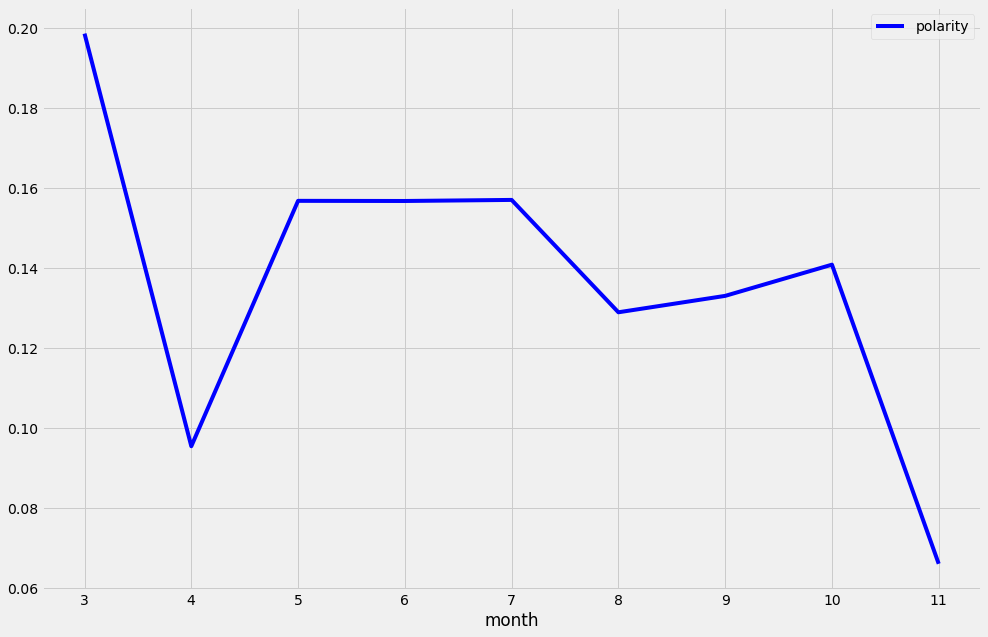

In [41]:
# Chart sentiments based on regions

df_time_sentiment.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(15, 10), color="blue")


## Extract Hashtags

In [42]:
df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,once upon a time before true story hanzolife...,tue apr 21 03:18:55 +0000 2020,phoenix,true hanzo4life barberhustle sharpfade barber ...,0.65,0.35,positive,upon time true stori hanzolif barberhustl s...,2020-04-21 03:18:55,4
1,this shit just got real i waited to post this ...,thu mar 26 18:40:42 +0000 2020,mesa,<na>,0.55,0.00,neutral,shit got real wait post overwhelm me...,2020-03-26 18:40:42,3
2,are you open icecreamstudio is takeout takeou...,fri mar 20 19:17:19 +0000 2020,phoenix,212icecreamstudio takeout takeoutfood icecream...,0.50,0.00,neutral,open icecreamstudio takeout takeoutfood ice...,2020-03-20 19:17:19,3
3,do not listen to what they say watch what the...,sat apr 25 02:43:09 +0000 2020,scottsdale,staysafe safety family coronavirus security st...,1.00,-0.50,negative,listen say watch dostaysaf safeti famil...,2020-04-25 02:43:09,4
4,i was at home celebrating minding my own biz ...,tue apr 21 06:52:15 +0000 2020,mesa,dj turntablist portablist turnstyledjtraining ...,1.00,0.60,positive,home celebr mind biz shaq pac albert ca...,2020-04-21 06:52:15,4
5,get your stanky booty to cave creek amp carefr...,thu apr 16 05:21:19 +0000 2020,cave creek,walmart cavecreek toiletpaper quarantinelife m...,0.00,0.00,neutral,get stanki booti cave creek amp carefre mo...,2020-04-16 05:21:19,4
6,my coronacation has taken pandora and me to di...,mon apr 20 15:38:02 +0000 2020,scottsdale,coronacation2020 covid19,0.00,0.00,neutral,coronac taken pandora disney world flori...,2020-04-20 15:38:02,4
7,inground trampoline installation flips backfli...,sun apr 05 16:26:12 +0000 2020,scottsdale,flips backflip gymternet parkour gymnastics tu...,0.00,0.00,neutral,inground trampolin instal flip backflip gymter...,2020-04-05 16:26:12,4
8,on our ascent on the corona de loma trail tra...,sat apr 04 17:28:16 +0000 2020,phoenix,trailporn coronadeloma southmountain hikearizo...,0.00,0.00,neutral,ascent corona de loma trail trail porn tra...,2020-04-04 17:28:16,4
9,getting those corona legs finally verrado buc...,sat apr 18 23:14:46 +0000 2020,buckeye,<na>,1.00,0.00,neutral,get corona leg final verrado buckey,2020-04-18 23:14:46,4


In [43]:
## Extract Hashtags
positiveHashtags = []
negativeHashtags = []


for i in range(nRecords):
    if (df_text['analysis'][i]=='positive'):
        #positive sentiment  
        if ('<na>' in df_text['hashtags'][i]):      
            continue  
        else:
            splitList = str(df_text['hashtags'][i]).split(" ")            
            positiveHashtags = positiveHashtags + splitList
    elif (df_text['analysis'][i]=='negative'):
        #negative sentiment
        if ('<na>' in df_text['hashtags'][i]):  
            continue
        else:    
            splitList = str(df_text['hashtags'][i]).split(" ")    
            negativeHashtags = negativeHashtags + splitList       
    else:
        # neutral sentiment
        continue


# positive_hashtags = df_allHashtags['hashtags']




In [44]:
# type(negativeHashtags)
# print (negativeHashtags)

#Clear up the list from unwanted hashtags
commercialHashtags = ["streetphotographer", "urbanstreetphotography","urbanstreetphotogallery","photodocumentary"
,"spicollective","cityscape","urbansteetphotogallery","ig_street","bnw","bw","lensculture","bollywood","entertainment","urbanstreetphotogallery"]


for element in negativeHashtags:
    if element in commercialHashtags:
        negativeHashtags.remove(element)

for element in positiveHashtags:
    if element in commercialHashtags:
        positiveHashtags.remove(element)        

In [45]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(negativeHashtags)
df_NegativeHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_NegativeHashtags = df_NegativeHashtags.nlargest(columns='count', n=30)                    
df_NegativeHashtags.head(20) 

,Hashtag,count
19,covid19,16
3,coronavirus,8
15,corona,5
23,covid_19,4
31,quarantine,4
93,arizona,4
130,workfromhome,4
7,trump,3
12,covid,3
28,pandemic,3


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

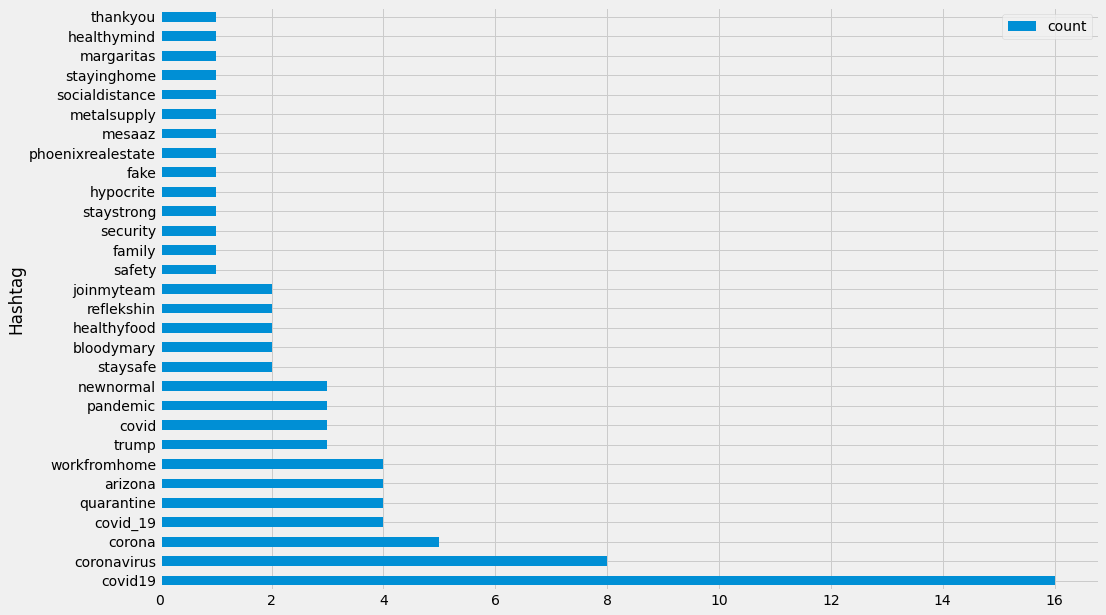

In [46]:
# display topc 20 negative tweets

plt.figure(figsize=(15,10))
df_NegativeHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))


In [47]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(positiveHashtags)
df_PositiveHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_PositiveHashtags = df_PositiveHashtags.nlargest(columns='count', n=30)       


df_PositiveHashtags.head(20) 

                 

,Hashtag,count
23,covid19,77
46,coronavirus,39
53,covid,38
37,quarantine,29
102,arizona,24
25,corona,22
22,stayhome,20
110,socialdistancing,17
40,staysafe,15
448,workfromhome,14


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

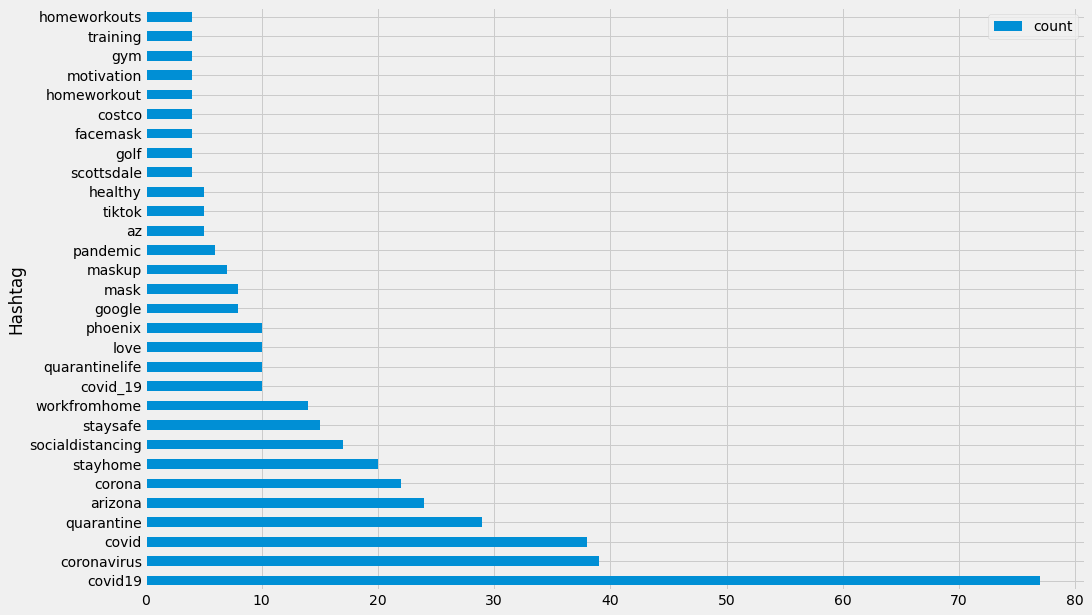

In [48]:
# display topc 20 positive tweets
plt.figure(figsize=(15,10))
df_PositiveHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))

In [49]:
# df_text['strTweets'] = df_text['text'].to_string()
# df_text.head()

In [50]:
# type(df_text['strTweets'])
# type(df_text['text'])

#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if "negative":
        return 0 
    elif 'positive':
        return 1
    else:
        return 0

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['label'] = df_text['analysis'].apply(getSentAnalysis)


In [51]:
df_text.head()

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,once upon a time before true story hanzolife...,tue apr 21 03:18:55 +0000 2020,phoenix,true hanzo4life barberhustle sharpfade barber ...,0.65,0.35,positive,upon time true stori hanzolif barberhustl s...,2020-04-21 03:18:55,4,0
1,this shit just got real i waited to post this ...,thu mar 26 18:40:42 +0000 2020,mesa,<na>,0.55,0.00,neutral,shit got real wait post overwhelm me...,2020-03-26 18:40:42,3,0
2,are you open icecreamstudio is takeout takeou...,fri mar 20 19:17:19 +0000 2020,phoenix,212icecreamstudio takeout takeoutfood icecream...,0.50,0.00,neutral,open icecreamstudio takeout takeoutfood ice...,2020-03-20 19:17:19,3,0
3,do not listen to what they say watch what the...,sat apr 25 02:43:09 +0000 2020,scottsdale,staysafe safety family coronavirus security st...,1.00,-0.50,negative,listen say watch dostaysaf safeti famil...,2020-04-25 02:43:09,4,0
4,i was at home celebrating minding my own biz ...,tue apr 21 06:52:15 +0000 2020,mesa,dj turntablist portablist turnstyledjtraining ...,1.00,0.60,positive,home celebr mind biz shaq pac albert ca...,2020-04-21 06:52:15,4,0
